# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [75]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [76]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [77]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) #split 90% train 10% test

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

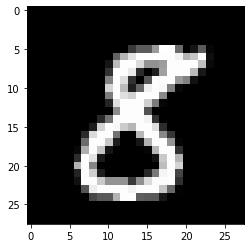

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.reshape(X_train[334,:],(28,28)), cmap='gray') #select image 334 -> need to reshape 1D vector to 2D

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [80]:
#define models
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

bayes=GaussianNB()
linear=linear_model.SGDClassifier(loss='log', max_iter=50) #limit number of iterations -> linear model will not converge
rf=RandomForestClassifier()

#now train all

In [81]:
%%time
bayes.fit(X_train,y_train)

CPU times: user 508 ms, sys: 761 ms, total: 1.27 s
Wall time: 1.32 s


GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
%%time
linear.fit(X_train,y_train)

CPU times: user 40.8 s, sys: 48.4 ms, total: 40.8 s
Wall time: 40.9 s


/home/keuper/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
%%time
rf.fit(X_train,y_train)

CPU times: user 40.1 s, sys: 289 ms, total: 40.4 s
Wall time: 40.5 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
#train error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [85]:
%%time
#Bayes
accuracy_score(y_train,bayes.predict(X_train))

CPU times: user 1.9 s, sys: 5.27 s, total: 7.17 s
Wall time: 7.24 s


0.5576984126984127

In [86]:
confusion_matrix(y_train,bayes.predict(X_train))

array([[5445,    9,   33,   15,   11,   14,  224,    5,  356,   96],
       [   2, 6653,   16,   26,    4,    9,   81,    2,  193,   69],
       [ 507,  168, 1892,  350,   24,   23, 1624,   17, 1615,   83],
       [ 319,  309,   53, 2030,   10,   14,  370,   48, 2738,  572],
       [ 146,   40,   56,   29,  863,   33,  588,   34, 1479, 2835],
       [ 544,  132,   34,  113,   28,  243,  324,   11, 3731,  526],
       [  45,   96,   31,    2,    5,   25, 5830,    0,  140,    7],
       [  23,   54,    9,   52,   44,    5,   22, 2062,  272, 4053],
       [  90,  728,   24,   45,   19,   32,  104,    9, 4226,  882],
       [  36,   35,   18,   11,   32,    3,    4,   83,  133, 5891]])

In [87]:
%%time
#Linear
accuracy_score(y_train,linear.predict(X_train))

CPU times: user 273 ms, sys: 39.8 ms, total: 313 ms
Wall time: 150 ms


0.8999206349206349

In [88]:
confusion_matrix(y_train,linear.predict(X_train))

array([[5998,    1,   17,   11,    7,   48,   73,    6,   46,    1],
       [   1, 6649,   77,   27,    9,   18,   19,   36,  206,   13],
       [  44,   14, 5484,  221,   68,   45,  135,   85,  193,   14],
       [  25,    5,  140, 5499,   36,  294,   89,   60,  218,   97],
       [  13,    9,   16,    5, 5695,   23,   63,   40,   80,  159],
       [  56,   10,   24,  151,   79, 4781,  205,   28,  288,   64],
       [  26,    7,    9,    6,   26,   66, 5993,    7,   38,    3],
       [  22,    5,   69,   27,   79,    6,    9, 6216,   32,  131],
       [  50,   51,   98,  134,   66,  278,   78,   63, 5266,   75],
       [  81,    7,   24,   66,  329,   69,    1,  421,  134, 5114]])

In [102]:
%%time
#random Forest
accuracy_score(y_test,rf.predict(X_test))

CPU times: user 387 ms, sys: 0 ns, total: 387 ms
Wall time: 396 ms


0.9707142857142858

In [103]:
confusion_matrix(y_test,rf.predict(X_test))

array([[684,   0,   1,   0,   0,   1,   2,   0,   7,   0],
       [  0, 815,   1,   2,   2,   0,   0,   1,   1,   0],
       [  2,   0, 670,   3,   1,   0,   1,   4,   6,   0],
       [  2,   2,   6, 646,   3,   7,   1,   2,   7,   2],
       [  0,   0,   3,   0, 710,   0,   1,   1,   0,   6],
       [  2,   1,   1,  10,   0, 604,   6,   1,   1,   1],
       [  2,   3,   0,   1,   1,  11, 675,   0,   2,   0],
       [  2,   2,   8,   0,   2,   1,   0, 673,   2,   7],
       [  0,   3,   2,   8,   0,   5,   0,   0, 643,   5],
       [  3,   2,   1,   2,   9,   2,   1,  12,   5, 675]])

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [91]:
from sklearn.metrics import f1_score
bayes_train_acc=accuracy_score(y_train,bayes.predict(X_train))
bayes_test_acc=accuracy_score(y_test,bayes.predict(X_test))
bayes_test_f1=f1_score(y_test,bayes.predict(X_test),average='micro') #f1 ins a binary measure, we need to average it over all classesd

In [92]:
linear_train_acc=accuracy_score(y_train,linear.predict(X_train))
linear_test_acc=accuracy_score(y_test,linear.predict(X_test))
linear_test_f1=f1_score(y_test,linear.predict(X_test),average='micro')

In [93]:
rf_train_acc=accuracy_score(y_train,rf.predict(X_train))
rf_test_acc=accuracy_score(y_test,rf.predict(X_test))
rf_test_f1=f1_score(y_test,rf.predict(X_test),average='micro')

In [94]:
rf_test_acc

0.9707142857142858

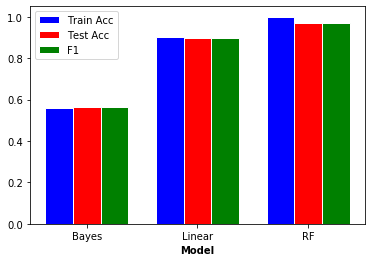

In [95]:
import matplotlib.pyplot as plt
train_acc=[bayes_train_acc,linear_train_acc,rf_train_acc]
test_acc=[bayes_test_acc,linear_test_acc,rf_test_acc]
test_f1=[bayes_test_f1,linear_test_f1,rf_test_f1]

# Set position of bar on X axis
barWidth = 0.25
r1 = np.arange(len(train_acc))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, train_acc, color='blue', width=barWidth, edgecolor='white', label='Train Acc')
plt.bar(r2, test_acc, color='red', width=barWidth, edgecolor='white', label='Test Acc')
plt.bar(r3, test_f1, color='green', width=barWidth, edgecolor='white', label='F1')

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(train_acc))], ['Bayes', 'Linear', 'RF'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [96]:
#ROC
from sklearn.metrics import roc_auc_score,  roc_curve, auc

#get the 5
y_five = y_test=='5' #get bool lables=='5' - NOTE original lables are strings! Generates Mask
bayes_five = bayes.predict_proba(X_test)[:,5] #get probability prediction for '5' 
linear_five = linear.predict_proba(X_test)[:,5]
rf_five = rf.predict_proba(X_test)[:,5]

/home/keuper/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:313: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


In [97]:
linear_five=np.nan_to_num(linear_five, nan=1)

In [98]:
bayes_fpr, bayes_tpr, _ = roc_curve(y_five.astype(int), bayes_five)
bayes_roc_auc = auc(bayes_fpr, bayes_tpr)
linear_fpr, linear_tpr, _ = roc_curve(y_five.astype(int), linear_five)
linear_roc_auc = auc(linear_fpr, linear_tpr)
rf_fpr, rf_tpr, _ = roc_curve(y_five.astype(int), rf_five)
rf_roc_auc = auc(rf_fpr, rf_tpr)

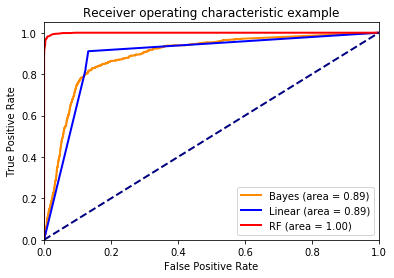

In [99]:
lw = 2
plt.plot(bayes_fpr, bayes_tpr, color='darkorange',
         lw=lw, label='Bayes (area = %0.2f)' % bayes_roc_auc)
plt.plot(linear_fpr, linear_tpr, color='blue',
         lw=lw, label='Linear (area = %0.2f)' % linear_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='red',
         lw=lw, label='RF (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
